In [104]:
from scipy.io import arff
import pandas as pd
import os                        # for os.path.exists
import json                      # for loading metadata
import urllib                    # for downloading remote files 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree
import sklearn.metrics
import sklearn.ensemble
import sklearn.preprocessing

In [375]:
# loading the Diabetic Retinopathy data that is downloaded 
data = arff.loadarff('resources/messidor_features.arff')
df = pd.DataFrame(data[0])
data = data[0]
data = data[0:len(data)]
data_list = []
# extract the data and conver
for x in data:
    x_data = list(x)
    data_list.append(x_data)

X_list = []
y_list = []
# split the data in a way that it can be converted to numpy array
for i in data_list:
    X_list.append(i[0:19]) 
    y_list.append(i[19:])

X = np.array(X_list)
y = np.array(y_list)

In [404]:
# splitting the testing and training
# testing will take 30% while training will take 70%
X_trn, X_tst, y_trn, y_tst = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
print(X.size)
print(X_trn.size)
print(X_tst.size)


21869
15295
6574


In [387]:
# define the train_estimators to train the required estimators
def train_estimators(X, y, estimator_type, param_name, param_vals, **kwargs):
    trainned_estimators = []
    for i in range(0,len(param_vals)):
        clf = estimator_type(**kwargs)
        clf.set_params(**{param_name:param_vals[i]})
        clf.fit(X,y)
        trainned_estimators.append(clf)
        print('Training ', clf, '...')
    return trainned_estimators

def score_estimators(X, y, estimators):
    accuracy_scores = []
    for i in range(0, len(estimators)):
        accuracy_scores.append(roundVal(estimators[i].score(X,y)))
    return accuracy_scores
        
def plot_estimator_scores(estimators, param_name, param_vals):
    x_arange = np.arange(len(param_vals))
    
    # compute the score of each data and store them as separate list
    y_ax_trn = score_estimators(X_trn, y_trn, estimators)
    y_ax_tst = score_estimators(X_tst, y_tst, estimators)

    # plot each of the ata
    plt.plot(x_arange, y_ax_tst, color='black', linestyle = 'dashed', label = "test");
    plt.plot(x_arange, y_ax_trn, color='green', marker='o', label = "train");
    plt.xticks(x_arange,param_vals)

    plt.xlabel(param_name)
    plt.ylabel('score')
    plt.title(str(estimators[0].__class__.__name__) + ' vs ' + param_name)
    plt.legend()
    plt.text(3.5, 0.4, 'train = ' + str(max(y_ax_trn)) , fontsize=10, color = 'green')
    plt.text(3.5, 0.2, 'test = ' + str(max(y_ax_tst)), fontsize=10, color = 'black')
    plt.ylim([0,1.1])
    plt.show()
    
def roundVal(val):
    rounded = round(val,3)
    return rounded

Training  LogisticRegression(C=1e-05, max_iter=10000, random_state=0) ...
Training  LogisticRegression(C=0.0001, max_iter=10000, random_state=0) ...
Training  LogisticRegression(C=0.001, max_iter=10000, random_state=0) ...
Training  LogisticRegression(C=0.01, max_iter=10000, random_state=0) ...
Training  LogisticRegression(C=0.1, max_iter=10000, random_state=0) ...
Training  LogisticRegression(C=1, max_iter=10000, random_state=0) ...


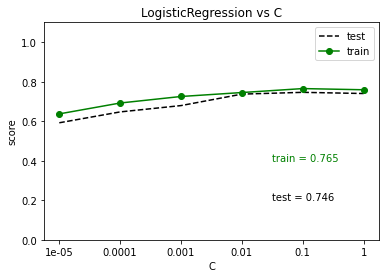

In [394]:
# train the data with LogisticRegression
logistic_estimators = train_estimators(X_trn, y_trn.ravel(), sklearn.linear_model.LogisticRegression,
                                   'C', [0.00001, 0.0001, 0.001, 0.01, 0.1, 1], max_iter=10000,  random_state=0)
plot_estimator_scores(logistic_estimators, 'C', [0.00001, 0.0001, 0.001, 0.01, 0.1, 1])


In [398]:
# train with svm classifier
svm_estimators = train_estimators(X_trn, y_trn.ravel(), sklearn.svm.SVC,
                                   'C', [0.01, 0.1, 1, 10.0, 100.0, 1000.0], gamma = 0.001, max_iter=10000,  random_state=0)

Training  SVC(C=0.01, gamma=0.001, max_iter=10000, random_state=0) ...
Training  SVC(C=0.1, gamma=0.001, max_iter=10000, random_state=0) ...
Training  SVC(C=1, gamma=0.001, max_iter=10000, random_state=0) ...
Training  SVC(C=10.0, gamma=0.001, max_iter=10000, random_state=0) ...
Training  SVC(C=100.0, gamma=0.001, max_iter=10000, random_state=0) ...
Training  SVC(C=1000.0, gamma=0.001, max_iter=10000, random_state=0) ...


/Users/william_huang/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/william_huang/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


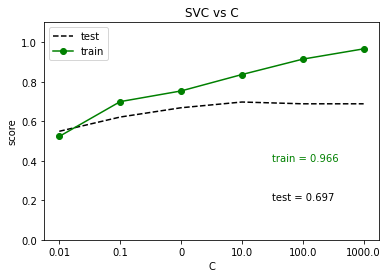

In [399]:
plot_estimator_scores(svm_estimators, 'C', [0.01, 0.1, 0, 10.0, 100.0, 1000.0])

In [406]:
tree_estimators = train_estimators(X_trn, y_trn, sklearn.tree.DecisionTreeClassifier,
                                   'max_depth', [1, 5, 10], splitter='random', random_state=0)

Training  DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random') ...
Training  DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random') ...
Training  DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random') ...


In [409]:
#plot_estimator_scores(tree_estimators, 'max_depth', [1, 5, 10, 20, 50, 100])

In [413]:
randomForest_estimators = train_estimators(X_trn, y_trn.ravel(), sklearn.ensemble.RandomForestClassifier,
                                   'max_depth', [1, 5, 10, 20, 50, 100],  random_state=0)

Training  RandomForestClassifier(max_depth=1, random_state=0) ...
Training  RandomForestClassifier(max_depth=5, random_state=0) ...
Training  RandomForestClassifier(max_depth=10, random_state=0) ...
Training  RandomForestClassifier(max_depth=20, random_state=0) ...
Training  RandomForestClassifier(max_depth=50, random_state=0) ...
Training  RandomForestClassifier(max_depth=100, random_state=0) ...


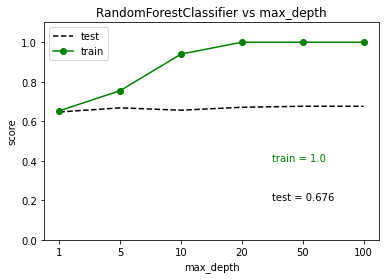

In [415]:
plot_estimator_scores(randomForest_estimators, 'max_depth', [1, 5, 10, 20, 50, 100])

In [422]:

neighbors_estimators = train_estimators(X_trn, y_trn.ravel(), sklearn.neighbors.KNeighborsRegressor,
                                   'n_neighbors', [5, 15, 20, 50, 100]) #[1, 5, 10, 20, 50, 100]

Training  KNeighborsRegressor() ...
Training  KNeighborsRegressor(n_neighbors=15) ...
Training  KNeighborsRegressor(n_neighbors=20) ...
Training  KNeighborsRegressor(n_neighbors=50) ...
Training  KNeighborsRegressor(n_neighbors=100) ...


In [428]:
#plot_estimator_scores(neighbors_estimators, 'n_neighbors', [5, 15, 20, 50, 100])
